In [1]:
import pandas as pd
import random
import itertools
import datetime as dt
import matplotlib.pyplot as plt

Downloaded data from: http://web.mta.info/developers/turnstile.html

Documentations at: http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt

Map of the MTA system: http://web.mta.info/maps/submap.html

In [2]:
df = pd.read_csv('turnstile_May26.txt')

Fix 'EXITS' column name (it has many spaces at the end of it)

In [3]:
# old_exit_name = df.columns[-1]
df.rename(columns={df.columns[-1]: 'EXITS'}, inplace = True)

In [4]:
backup_df = df.copy()

In [5]:
df['DATETIME'] = pd.to_datetime(df.DATE + ' ' + df.TIME)
df['DATE'] = pd.to_datetime(df['DATE'])

In [6]:
df['STATION_KEY'] = df['C/A'] + ' ' + df['UNIT'] + ' ' + df['STATION']

In [34]:
cols_to_drop = ['C/A','UNIT','STATION']

In [36]:
df.drop(cols_to_drop, axis=1, inplace=True)

Group by Station Key, then compute difference between 'ENTRIES'

In [21]:
# Don't think we need to do this, but kept code here just in case
# df.sort_values(['STATION_KEY', 'SCP', 'DATETIME'], inplace=True)

AttributeError: 'DataFrame' object has no attribute 'sort'

In [38]:
df['ENTRY_DIFFS'] = df.groupby(['STATION_KEY','SCP'])['ENTRIES'].diff()

In [40]:
grp1 = df.groupby(['STATION_KEY', 'DATE'])['ENTRY_DIFFS'].sum().reset_index()

In [52]:
grp1.head(21)

,STATION_KEY,DATE,ENTRY_DIFFS
0,A002 R051 59 ST,2018-05-19,5499.0
1,A002 R051 59 ST,2018-05-20,5969.0
2,A002 R051 59 ST,2018-05-21,12384.0
3,A002 R051 59 ST,2018-05-22,13599.0
4,A002 R051 59 ST,2018-05-23,14007.0
5,A002 R051 59 ST,2018-05-24,13899.0
6,A002 R051 59 ST,2018-05-25,13283.0
7,A006 R079 5 AV/59 ST,2018-05-19,4889.0
8,A006 R079 5 AV/59 ST,2018-05-20,6055.0
9,A006 R079 5 AV/59 ST,2018-05-21,11838.0


In [54]:
def station_day(st_loc, day_loc):
    '''Given station index and date index from grp1 dataframe,
    returns all entries from original data frame for this station & date'''
    s = grp1.loc[st_loc, 'STATION_KEY']
    t = grp1.loc[day_loc, 'DATE']
    return df[(df['DATE'] == t) & (df['STATION_KEY'] == s)]


In [57]:
station_day(0,0).head()

,SCP,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATETIME,STATION_KEY,ENTRY_DIFFS
0,02-00-00,NQR456W,BMT,2018-05-19,00:00:00,REGULAR,6625470,2018-05-19 00:00:00,A002 R051 59 ST,NaN
1,02-00-00,NQR456W,BMT,2018-05-19,04:00:00,REGULAR,6625494,2018-05-19 04:00:00,A002 R051 59 ST,24.0
2,02-00-00,NQR456W,BMT,2018-05-19,08:00:00,REGULAR,6625514,2018-05-19 08:00:00,A002 R051 59 ST,20.0
3,02-00-00,NQR456W,BMT,2018-05-19,12:00:00,REGULAR,6625595,2018-05-19 12:00:00,A002 R051 59 ST,81.0
4,02-00-00,NQR456W,BMT,2018-05-19,16:00:00,REGULAR,6625791,2018-05-19 16:00:00,A002 R051 59 ST,196.0


**Still need to clean up 'ENTRY_DIFFS'**

There are some large negative and positive values still, but majority are reasonable

In [58]:
df['ENTRY_DIFFS'].describe()

count    1.934710e+05
mean     1.511019e+03
std      6.671350e+06
min     -2.066081e+09
25%      9.000000e+00
50%      7.500000e+01
75%      2.500000e+02
max      2.066520e+09
Name: ENTRY_DIFFS, dtype: float64

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.93460000e+05,   9.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ -2.06608118e+09,  -1.65282109e+09,  -1.23956101e+09,
         -8.26300924e+08,  -4.13040839e+08,   2.19246500e+05,
          4.13479332e+08,   8.26739417e+08,   1.23999950e+09,
          1.65325959e+09,   2.06651967e+09]),
 <a list of 10 Patch objects>)

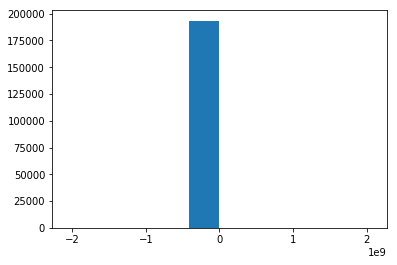

In [59]:
plt.hist(df['ENTRY_DIFFS'].dropna())

Inspect largest outliers more closely:

In [63]:
df.sort_values('ENTRY_DIFFS').head()

,SCP,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATETIME,STATION_KEY,ENTRY_DIFFS
88545,02-00-04,EMG,IND,2018-05-22,12:00:00,REGULAR,1349914,2018-05-22 12:00:00,N400A R359 COURT SQ,-2.066081e+09
30803,00-00-00,L,BMT,2018-05-20,12:00:00,REGULAR,353,2018-05-20 12:00:00,H009 R235 BEDFORD AV,-4.451601e+06
161118,00-00-00,245,IRT,2018-05-20,08:00:00,RECOVR AUD,7,2018-05-20 08:00:00,R261 R205 149/GRAND CONC,-2.430944e+06
152677,01-00-02,4567S,IRT,2018-05-20,17:00:00,REGULAR,126,2018-05-20 17:00:00,R237B R047 GRD CNTRL-42 ST,-2.381153e+06
28887,02-00-03,DFNQ,BMT,2018-05-24,13:00:00,REGULAR,134,2018-05-24 13:00:00,G009 R151 CONEY IS-STILLW,-1.948933e+06


In [47]:
df.loc[88540:88550]

,SCP,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATETIME,STATION_KEY,ENTRY_DIFFS
88540,02-00-04,EMG,IND,2018-05-21,12:00:00,RECOVR AUD,2067432808,2018-05-21 12:00:00,N400A R359 COURT SQ,-4.750000e+02
88541,02-00-04,EMG,IND,2018-05-21,16:00:00,RECOVR AUD,2067432493,2018-05-21 16:00:00,N400A R359 COURT SQ,-3.150000e+02
88542,02-00-04,EMG,IND,2018-05-21,20:00:00,REGULAR,2067431152,2018-05-21 20:00:00,N400A R359 COURT SQ,-1.341000e+03
88543,02-00-04,EMG,IND,2018-05-22,00:00:00,REGULAR,2067431097,2018-05-22 00:00:00,N400A R359 COURT SQ,-5.500000e+01
88544,02-00-04,EMG,IND,2018-05-22,04:00:00,REGULAR,2067431093,2018-05-22 04:00:00,N400A R359 COURT SQ,-4.000000e+00
88545,02-00-04,EMG,IND,2018-05-22,12:00:00,REGULAR,1349914,2018-05-22 12:00:00,N400A R359 COURT SQ,-2.066081e+09
88546,02-00-04,EMG,IND,2018-05-22,16:00:00,REGULAR,1350158,2018-05-22 16:00:00,N400A R359 COURT SQ,2.440000e+02
88547,02-00-04,EMG,IND,2018-05-22,20:00:00,REGULAR,1350973,2018-05-22 20:00:00,N400A R359 COURT SQ,8.150000e+02
88548,02-00-04,EMG,IND,2018-05-23,00:00:00,REGULAR,1351066,2018-05-23 00:00:00,N400A R359 COURT SQ,9.300000e+01
88549,02-00-04,EMG,IND,2018-05-23,04:00:00,REGULAR,1351077,2018-05-23 04:00:00,N400A R359 COURT SQ,1.100000e+01


Why are there any negative values? Can we just drop them?

In [51]:
len(df[df['ENTRY_DIFFS'] < 0]), len(df)

(1637, 198174)

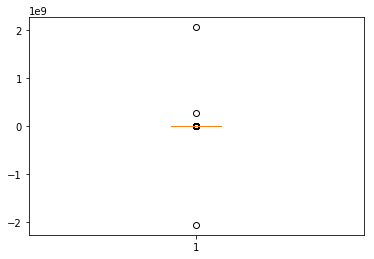

In [68]:
plt.boxplot(df['ENTRY_DIFFS'].dropna());

In [120]:
clean_df = df[(df['ENTRY_DIFFS'] < 2E5) & (df['ENTRY_DIFFS'] > 0)]

(array([  1.25535000e+05,   2.53550000e+04,   7.47900000e+03,
          2.27300000e+03,   8.31000000e+02,   2.89000000e+02,
          8.10000000e+01,   5.10000000e+01,   1.50000000e+01,
          3.00000000e+00]),
 array([  1.00000000e+00,   3.28800000e+02,   6.56600000e+02,
          9.84400000e+02,   1.31220000e+03,   1.64000000e+03,
          1.96780000e+03,   2.29560000e+03,   2.62340000e+03,
          2.95120000e+03,   3.27900000e+03]),
 <a list of 10 Patch objects>)

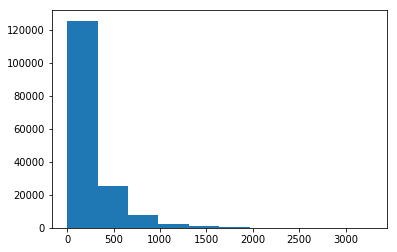

In [121]:
plt.hist(clean_df['ENTRY_DIFFS'].dropna())

{'boxes': [<matplotlib.lines.Line2D at 0x1272109b0>],
 'caps': [<matplotlib.lines.Line2D at 0x127216400>,
 'fliers': [<matplotlib.lines.Line2D at 0x12721c0b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x127216c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x127210b00>,
  <matplotlib.lines.Line2D at 0x127210f98>]}

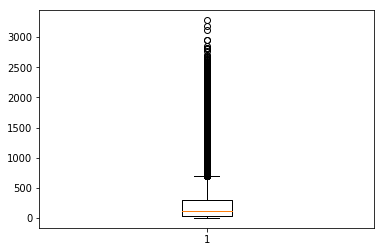

In [122]:
plt.boxplot(clean_df['ENTRY_DIFFS'].dropna())

In [123]:
clean_df.sort_values('ENTRY_DIFFS').tail()

,SCP,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATETIME,STATION_KEY,ENTRY_DIFFS
177825,00-03-00,NQW,BMT,2018-05-23,12:00:00,REGULAR,37305108,2018-05-23 12:00:00,R512 R092 BROADWAY,2945.0
153236,00-03-03,4567S,IRT,2018-05-22,20:00:00,REGULAR,3981820,2018-05-22 20:00:00,R238 R046 GRD CNTRL-42 ST,2950.0
153289,00-03-04,4567S,IRT,2018-05-24,20:00:00,REGULAR,35056770,2018-05-24 20:00:00,R238 R046 GRD CNTRL-42 ST,3110.0
177831,00-03-00,NQW,BMT,2018-05-24,12:00:00,REGULAR,37313045,2018-05-24 12:00:00,R512 R092 BROADWAY,3184.0
153277,00-03-04,4567S,IRT,2018-05-22,20:00:00,REGULAR,35039938,2018-05-22 20:00:00,R238 R046 GRD CNTRL-42 ST,3279.0


In [111]:
s = clean_df.sort_values('ENTRY_DIFFS').tail(1)['STATION_KEY'].values[0]
s

'PTH03 R552 JOURNAL SQUARE'

In [100]:
def station_day2(s, d):
    '''Given station key and date,
    returns all entries from original data frame for this station & date'''
    return clean_df[(clean_df['DATE'] == d) & (clean_df['STATION_KEY'] == s)]


In [116]:
df00 = station_day2(s, dt.datetime(2018,5,19))
len(df00)

92

In [118]:
df00['ENTRY_DIFFS'].describe()

count        92.000000
mean       9443.826087
std       89371.535580
min           2.000000
25%          26.250000
50%          81.500000
75%         208.000000
max      857347.000000
Name: ENTRY_DIFFS, dtype: float64

In [119]:
df00[df00['ENTRY_DIFFS']> 300]

,SCP,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,DATETIME,STATION_KEY,ENTRY_DIFFS
112387,00-00-06,1,PTH,2018-05-19,15:36:58,REGULAR,1291629,2018-05-19 15:36:58,PTH03 R552 JOURNAL SQUARE,305.0
112426,00-00-07,1,PTH,2018-05-19,10:02:14,REGULAR,4313167,2018-05-19 10:02:14,PTH03 R552 JOURNAL SQUARE,320.0
112427,00-00-07,1,PTH,2018-05-19,14:14:14,REGULAR,4313512,2018-05-19 14:14:14,PTH03 R552 JOURNAL SQUARE,345.0
112428,00-00-07,1,PTH,2018-05-19,18:26:14,REGULAR,4313872,2018-05-19 18:26:14,PTH03 R552 JOURNAL SQUARE,360.0
112466,00-00-08,1,PTH,2018-05-19,10:50:37,REGULAR,816856,2018-05-19 10:50:37,PTH03 R552 JOURNAL SQUARE,418.0
112467,00-00-08,1,PTH,2018-05-19,15:02:37,REGULAR,817223,2018-05-19 15:02:37,PTH03 R552 JOURNAL SQUARE,367.0
112506,00-00-09,1,PTH,2018-05-19,12:07:06,REGULAR,857098,2018-05-19 12:07:06,PTH03 R552 JOURNAL SQUARE,520.0
112508,00-00-09,1,PTH,2018-05-19,20:17:06,REGULAR,857862,2018-05-19 20:17:06,PTH03 R552 JOURNAL SQUARE,857347.0
112588,00-01-00,1,PTH,2018-05-19,08:52:22,REGULAR,633,2018-05-19 08:52:22,PTH03 R552 JOURNAL SQUARE,393.0
112590,00-01-00,1,PTH,2018-05-19,18:37:03,REGULAR,1100,2018-05-19 18:37:03,PTH03 R552 JOURNAL SQUARE,388.0


In [64]:
len(df['STATION_KEY'].unique())

732